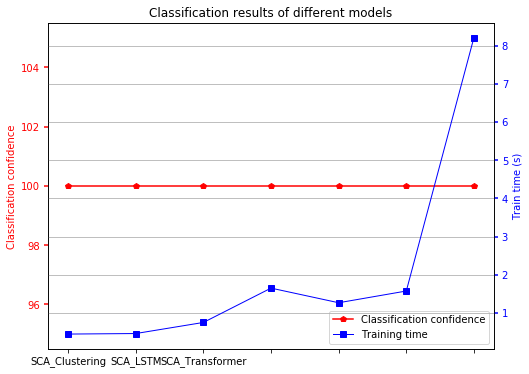

In [23]:
# plt.figure() #figsize=(8,6)

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(7)
#%% 'Transformer', 'LSTM', 'CNN', 'Convolutional SC Attention','Convolutional SCT Attention','FCNN 1D' , 'ResNets'
#%% Transformer layers: 2;
#%% LSTM layers: 2;

Confidence = [100.00, 100.00, 100.00, 100.00, 100.00,  100.00, 100.00]
Train_time = [0.449, 0.463, 0.753, 1.652, 1.269, 1.576, 8.211 ] # s
Trainable_parm = [1830.511, 6273.391, 23.307, 659.525, 1953.353, 1204.335, 2354.535 ] # k # the trainable parameters need to be calculated;
Train_memory = [0.1,  0.9,  0.0,  0.4,  0.5, 0.1, 7.1] #GB
Train_epoch = [30, 25, 5, 8, 5, 300, 4]
Classification_boundary = [184, 175, 173, 182, 188, 188, 178]
# Confidence =np.array(Confidence)

Train_Loss = [0.119179, 0.113147] # loss;
Complexity = [20289,5633] # the trainable parameters need to be calculated;
Train_iter_n = [45,15] # the trainable parameters need to be calculated;

fig, host = plt.subplots(figsize=(8,6))
# fig.subplots_adjust(right=0.8)

par1 = host.twinx()
style_s = 1

p1, =host.plot(x, Confidence,'r-p',label='Classification confidence')
p2, =par1.plot(x, Train_time,'b-s',label='Training time',ls='--' if (style_s == 0) else'-',lw='1' )

# host.set_xlabel("Method")
host.set_ylabel("Classification confidence")
par1.set_ylabel("Train time (s)")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())


tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)

plt.title('Classification results of different models')

lines = [p1, p2]
host.legend(lines, [l.get_label() for l in lines],loc='lower right')
plt.xticks(x, ('SCA_Clustering', 'SCA_LSTM', 'SCA_Transformer'),rotation=45) 
plt.grid(True)
# plt.show()

save_figures_to = '/gpfs/exfel/data/user/sunyue/Spectra_classification_Second&Conf_Paper/ClassificationFigures/'
plt.savefig(save_figures_to+"Classification results of different models 1D.svg", bbox_inches='tight', dpi=300)
# plt.savefig(save_figures_to+"Classification results of different models.svg", bbox_inches='tight')
# yy='yy.png'
# plt.savefig(yy)

In [24]:
import random
import torch
from torch import nn, optim
import math
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
from cycler import cycler
import matplotlib.style
import matplotlib as mpl
from mpl_toolkits import mplot3d 

from matplotlib.lines import Line2D
import seaborn as sns

In [25]:
energy = torch.randn(3, 4)
print(energy,torch.max(energy, -1, keepdim=True)[0],torch.max(energy, -1, keepdim=True)[0].expand_as(energy))
energy_new = torch.max(energy, -1, keepdim=True)[0].expand_as(energy)-energy
print(energy_new)

tensor([[-1.5925,  1.5906, -0.0541, -0.4457],
        [-2.8071, -0.3135,  0.5517, -0.1859],
        [ 0.2074,  1.1823, -0.1274,  0.5643]]) tensor([[1.5906],
        [0.5517],
        [1.1823]]) tensor([[1.5906, 1.5906, 1.5906, 1.5906],
        [0.5517, 0.5517, 0.5517, 0.5517],
        [1.1823, 1.1823, 1.1823, 1.1823]])
tensor([[3.1831, 0.0000, 1.6447, 2.0363],
        [3.3588, 0.8652, 0.0000, 0.7376],
        [0.9750, 0.0000, 1.3097, 0.6180]])


In [26]:
type(Confidence)

list

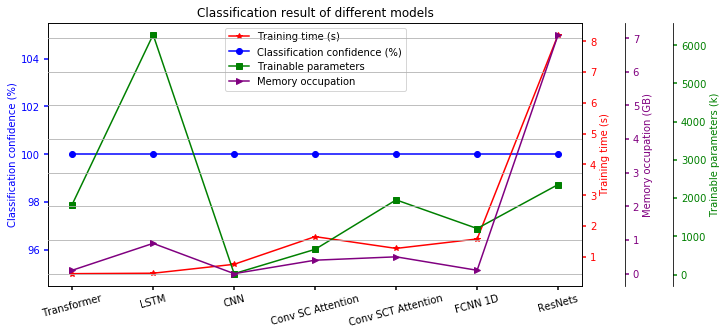

In [27]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, host = plt.subplots(figsize=(11,5))
fig.subplots_adjust(right=0.8)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

par2.spines["right"].set_position(("axes", 1.17))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

par3.spines["right"].set_position(("axes", 1.08))
make_patch_spines_invisible(par3)
par3.spines["right"].set_visible(True)

p1, = host.plot(x, Confidence,'bo-',color='blue',label='Classification confidence (%)')
p1_1, = par1.plot(x, Train_time,'*-',color='red',label='Training time (s)')
p2, = par2.plot(x, Trainable_parm,'gs-',color='green',label='Trainable parameters')
p3, = par3.plot(x, Train_memory,'>-',color='purple',label='Memory occupation')

host.set_xlabel("")
host.set_ylabel("Classification confidence (%)")
par1.set_ylabel("Training time (s)")
par2.set_ylabel("Trainable parameters (k)")
par3.set_ylabel("Memory occupation (GB)")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p1_1.get_color())
par2.yaxis.label.set_color(p2.get_color())
par3.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p1_1.get_color(), **tkw)
par2.tick_params(axis='y', colors=p2.get_color(), **tkw)
par3.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

# par1.set_ylim(170,180)

lines = [p1_1,p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines],loc='upper center')
plt.title('Classification result of different models')
plt.subplots_adjust(bottom=0.15)
plt.xticks(x, ('Transformer', 'LSTM', 'CNN', 'Conv SC Attention', 'Conv SCT Attention', 'FCNN 1D', 'ResNets'),rotation=30) 
plt.setp(host.xaxis.get_majorticklabels(), rotation=15)
plt.grid(True)
plt.savefig(save_figures_to+"Classification result of different model.svg")

# Training samples in each model

# feature importance analysis

In [11]:
fname = 'First and last original training data sample.txt'
Trn_sampleF, Trn_sampleE= np.loadtxt(fname, unpack=True) # reads all files in range and assigns 1st column to thetas and 2nd to Is
print(Trn_sampleF, Trn_sampleE)

fname = 'Transformer S_ATT model feature importance.txt'
f_impt_Transformer = np.loadtxt(fname, unpack=True) # reads all files in range and assigns 1st column to thetas and 2nd to Is

fname = 'LSTM model feature importance.txt'
f_impt_LSTM = np.loadtxt(fname, unpack=True) # reads all files in range and assigns 1st column to thetas and 2nd to Is

fname = 'CNN-based(CONV1by1) model feature importance.txt'
f_impt_CNN = np.loadtxt(fname, unpack=True) # reads all files in range and assigns 1st column to thetas and 2nd to Is

fname = 'Convolutional SC-FFwd attention model feature importance.txt'
f_impt_CNNATT_SC = np.loadtxt(fname, unpack=True) # reads all files in range and assigns 1st column to thetas and 2nd to Is

fname = 'Convolutional SCT_CAM-FFwd attention model feature importance.txt'
f_impt_CNNATT_SCT = np.loadtxt(fname, unpack=True) # reads all files in range and assigns 1st column to thetas and 2nd to Is

fname = 'FNN1D model feature importance.txt'
f_impt_FNN1D = np.loadtxt(fname, unpack=True) # reads all files in range and assigns 1st column to thetas and 2nd to Is

fname = 'ResNet model feature importance.txt'
f_impt_ResNet = np.loadtxt(fname, unpack=True) # reads all files in range and assigns 1st column to thetas and 2nd to Is


[1.52722371 1.53697574 1.41217577 ... 4.29287434 4.07565689 4.99313784] [2.35097933 1.73083746 1.31278384 ... 0.54960746 0.89093816 2.34838867]


In [12]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [13]:
f_impt_CNN[0:100]

array([-1.39316558e-04, -3.94114380e-04, -4.06514999e-04, -3.81749531e-04,
       -9.62584018e-05, -4.45763959e-04, -5.82853536e-05,  5.18440793e-05,
        7.73028733e-05, -1.02418802e-04,  3.14237783e-04, -2.49032528e-05,
        2.76417250e-05,  2.13975618e-05,  7.45272482e-05,  3.11792392e-05,
       -6.15935323e-06,  1.41798810e-04, -2.89014744e-04,  1.19795353e-04,
       -2.58815526e-05, -5.00908718e-05,  1.13932212e-04, -1.04611536e-04,
        2.18716359e-05, -1.57901493e-04, -2.54775980e-04, -1.35597074e-04,
       -7.93513682e-05, -1.96283028e-04, -5.49307188e-05, -1.16749434e-04,
        3.22165957e-04, -1.67087681e-04, -2.75782659e-04, -3.40381957e-04,
       -2.43997318e-04, -7.79908714e-06, -5.54149938e-06,  8.87253700e-05,
        1.48942810e-04,  3.88769949e-05, -2.20971517e-04, -1.24058599e-04,
       -2.65615992e-04, -1.69930736e-05, -2.15524822e-04,  3.67531029e-05,
       -6.55774929e-05,  7.78050453e-05, -1.34136571e-04, -1.93522155e-05,
       -4.73780383e-05,  

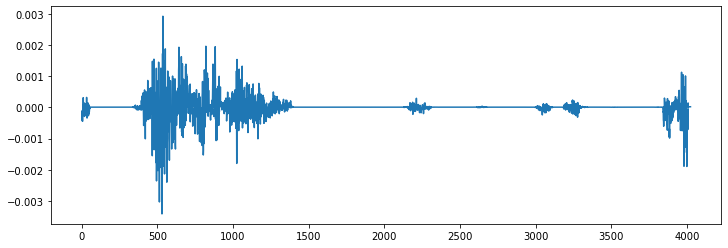

In [14]:
fig, axs = plt.subplots(1, figsize=(12,4))
axs.plot(f_impt_CNN)

In [15]:
f_impt_CNNATT_SC[0:100]

array([ 2.45642750e-05,  1.72532182e-05, -1.09724533e-05, -4.84021512e-05,
        1.04154649e-04,  9.61665410e-06, -7.13920308e-05, -4.63574270e-06,
       -7.96059612e-05,  5.52434940e-05,  1.62988654e-05,  3.15331090e-05,
        2.25486801e-05,  3.93707887e-05, -2.42588882e-04,  1.27249223e-04,
        1.17922755e-04,  6.74934709e-05,  2.50558769e-05,  6.13800439e-05,
        3.78626428e-05, -2.40786540e-06,  8.80354564e-05, -8.96498677e-05,
       -3.34288088e-05,  3.04166861e-07, -1.58992825e-05, -1.05061466e-04,
       -1.72690197e-05,  1.59005227e-04,  1.12625203e-04,  2.09463069e-05,
        3.95831994e-05,  1.44092101e-05,  1.11943460e-04,  2.78719526e-05,
        1.00352030e-04,  3.76349199e-05, -4.37662420e-05, -8.16048996e-05,
        1.18803277e-04,  3.80573256e-05,  1.62747194e-04,  5.33474013e-05,
       -3.24978355e-05, -5.11026374e-05,  5.62940077e-05, -2.28820227e-05,
        1.97686422e-05, -1.42414901e-05, -5.14496642e-05,  6.02198634e-05,
        2.54698462e-05,  

In [16]:
f_impt_CNNATT_SCT

array([ 2.31001081e-07, -2.91123968e-07,  5.40130962e-08,  1.28336501e-06,
       -3.82934445e-07,  8.96349377e-07,  4.02721355e-07,  1.27927683e-06,
        1.36890640e-06,  1.42875137e-06,  3.44328640e-07,  1.29832097e-06,
        1.54066379e-06,  1.25068777e-06,  2.09872894e-07,  1.35268397e-06,
        1.32638789e-09, -3.62342860e-07, -1.55536419e-08,  3.32597807e-07,
        6.36103437e-07,  2.46881598e-07,  3.63205004e-07,  6.65983322e-08,
       -7.37800665e-09,  9.61871294e-09, -2.91779756e-08,  1.03743503e-09,
       -1.65303637e-09,  2.08891571e-09, -2.73163686e-10, -1.51842872e-09,
       -1.57676738e-09, -1.78877546e-09,  4.49481230e-10, -1.85937765e-10,
       -3.70310976e-10, -7.25907057e-10,  1.34481781e-09,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.97262595e-10,  2.56534793e-10, -2.56740629e-10,  2.14549975e-10,
        4.98937212e-08, -5.28121120e-08,  4.78995830e-08,  4.90124457e-08,
        4.95736145e-08, -

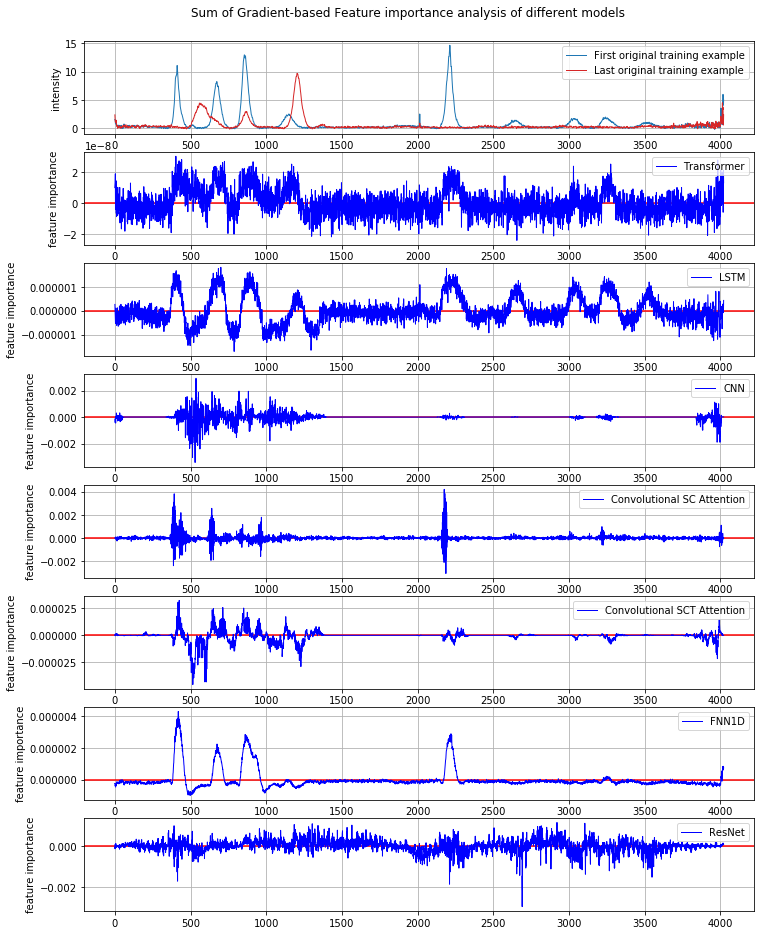

In [17]:

fig, axs = plt.subplots(8, figsize=(12,16))
axs[0].plot(Trn_sampleF,'tab:blue',linewidth=1,label='First original training example')
axs[0].plot(Trn_sampleE,'tab:red',linewidth=1,label='Last original training example')
axs[0].set_ylabel("intensity")
axs[0].legend()
axs[0].grid()

axs[1].axhline(y=0, color='r', linestyle='-')
axs[1].plot(f_impt_Transformer,'b',linewidth=1,label='Transformer')
axs[1].set_ylabel("feature importance")  #/gradient
axs[1].legend()
axs[1].grid()
# plt.suptitle('Feature importance in Transformer model')


axs[2].axhline(y=0, color='r', linestyle='-')
axs[2].plot(f_impt_LSTM,'b',linewidth=1,label='LSTM')
axs[2].set_ylabel("feature importance")
axs[2].legend()
axs[2].grid()
# plt.suptitle('Feature importance in Transformer model')

axs[3].axhline(y=0, color='r', linestyle='-')
axs[3].plot(f_impt_CNN,'b',linewidth=1,label='CNN')
axs[3].set_ylabel("feature importance")
axs[3].legend()
axs[3].grid()
# plt.suptitle('Feature importance in Transformer model')

axs[4].axhline(y=0, color='r', linestyle='-')
axs[4].plot(f_impt_CNNATT_SC,'b',linewidth=1,label='Convolutional SC Attention')
axs[4].set_ylabel("feature importance")
axs[4].legend()
axs[4].grid()
# plt.suptitle('Feature importance in Transformer model')

axs[5].axhline(y=0, color='r', linestyle='-')
axs[5].plot(f_impt_CNNATT_SCT,'b',linewidth=1,label='Convolutional SCT Attention')
axs[5].set_ylabel("feature importance")
axs[5].legend()
axs[5].grid()

axs[6].axhline(y=0, color='r', linestyle='-')
axs[6].plot(f_impt_FNN1D,'b',linewidth=1,label='FNN1D')
axs[6].set_ylabel("feature importance")
axs[6].legend()
axs[6].grid()
# plt.suptitle('Feature importance in Transformer model')

axs[7].axhline(y=0, color='r', linestyle='-')
axs[7].plot(f_impt_ResNet,'b',linewidth=1,label='ResNet')
axs[7].set_ylabel("feature importance")
axs[7].legend()
axs[7].grid()

fig.suptitle('Sum of Gradient-based Feature importance analysis of different models',y=0.91)
# fig.tight_layout()

plt.savefig(save_figures_to+"Sum of Gradient-based Feature importance analysis of different models.png", bbox_inches='tight', dpi=300)

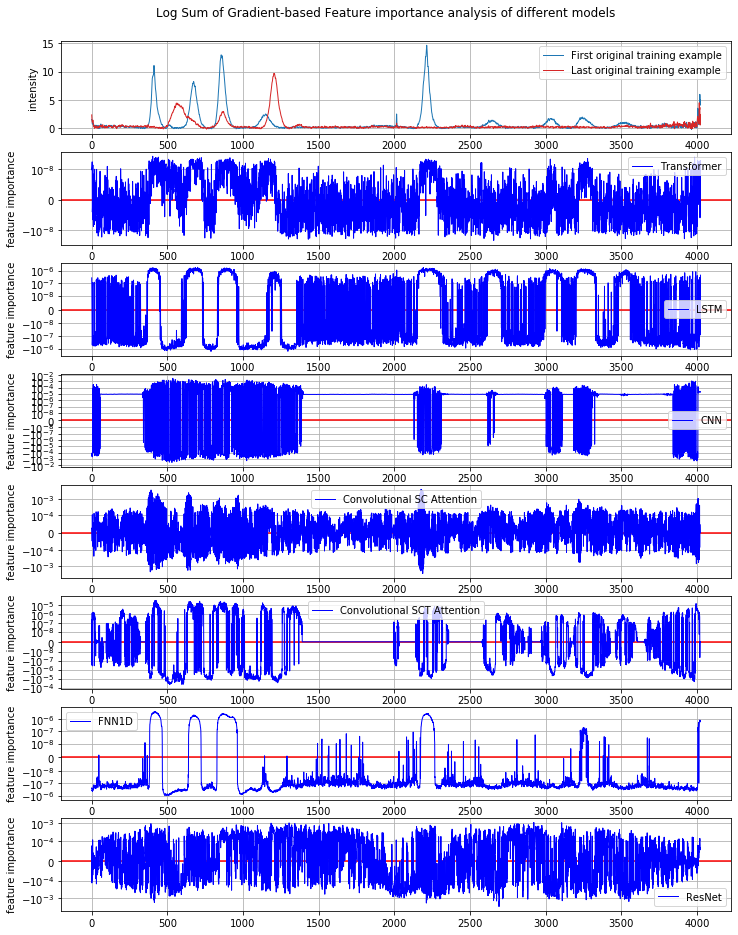

In [18]:
# log scale

fig, axs = plt.subplots(8, figsize=(12,16))
axs[0].plot(Trn_sampleF,'tab:blue',linewidth=1,label='First original training example')
axs[0].plot(Trn_sampleE,'tab:red',linewidth=1,label='Last original training example')
axs[0].set_ylabel("intensity")
axs[0].legend()
axs[0].grid()

linthreshy_v = 1e-8
log_bias = 0
# x = f_impt_Transformer
# f_impt_Transformer = -np.sign(x)*(np.log2(abs(x) + log_bias))
axs[1].axhline(y=0, color='r', linestyle='-')
axs[1].set_yscale('symlog', linthreshy=linthreshy_v)
axs[1].plot(f_impt_Transformer,'b',linewidth=1,label='Transformer')
axs[1].set_ylabel("feature importance")  #/gradient
axs[1].legend()
axs[1].grid()
# plt.suptitle('Feature importance in Transformer model')


# x = f_impt_LSTM
# f_impt_LSTM = -np.sign(x)*(np.log2(abs(x)+ log_bias))
axs[2].axhline(y=0, color='r', linestyle='-')
axs[2].set_yscale('symlog', linthreshy = linthreshy_v)
axs[2].plot(f_impt_LSTM,'b',linewidth=1,label='LSTM')
axs[2].set_ylabel("feature importance")
axs[2].legend()
axs[2].grid()
# plt.suptitle('Feature importance in Transformer model')

# x = f_impt_CNN
# f_impt_CNN = -np.sign(x)*(np.log2(abs(x)+ log_bias))
axs[3].axhline(y=0, color='r', linestyle='-')
axs[3].set_yscale('symlog', linthreshy = linthreshy_v)
axs[3].plot(f_impt_CNN,'b',linewidth=1,label='CNN')
axs[3].set_ylabel("feature importance")
axs[3].legend()
axs[3].grid()
# plt.suptitle('Feature importance in Transformer model')

# x = f_impt_CNNATT_SC
# f_impt_CNNATT_SC = -np.sign(x)*(np.log2(abs(x)+ log_bias))
axs[4].axhline(y=0, color='r', linestyle='-')
axs[4].plot(f_impt_CNNATT_SC,'b',linewidth=1,label='Convolutional SC Attention')
axs[4].set_yscale('symlog', linthreshy = 1e-4)
axs[4].set_ylabel("feature importance")
axs[4].legend()
axs[4].grid()
# plt.suptitle('Feature importance in Transformer model')

# x = f_impt_CNNATT_SCT
# f_impt_CNNATT_SCT = np.sign(x)*(np.log2(abs(x)+ log_bias))
axs[5].axhline(y=0, color='r', linestyle='-')
axs[5].plot(f_impt_CNNATT_SCT,'b',linewidth=1,label='Convolutional SCT Attention')
axs[5].set_yscale('symlog', linthreshy = linthreshy_v)
axs[5].set_ylabel("feature importance")
axs[5].legend()
axs[5].grid()

# x = f_impt_FNN1D
# f_impt_FNN1D = -np.sign(x)*(np.log2(abs(x)+ log_bias))
axs[6].axhline(y=0, color='r', linestyle='-')
axs[6].set_yscale('symlog', linthreshy = linthreshy_v)
axs[6].plot(f_impt_FNN1D,'b',linewidth=1,label='FNN1D')
axs[6].set_ylabel("feature importance")
axs[6].legend()
axs[6].grid()
# plt.suptitle('Feature importance in Transformer model')

# x = f_impt_ResNet
# f_impt_ResNet = -np.sign(x)*(np.log2(abs(x)+ log_bias))
axs[7].axhline(y=0, color='r', linestyle='-')
axs[7].set_yscale('symlog', linthreshy = 1e-4)
axs[7].plot(f_impt_ResNet,'b',linewidth=1,label='ResNet')
axs[7].set_ylabel("feature importance")
axs[7].legend()
axs[7].grid()

# plt.yscale('symlog')


fig.suptitle('Log Sum of Gradient-based Feature importance analysis of different models',y=0.91)
# fig.tight_layout()

plt.savefig(save_figures_to+"Log Sum of Gradient-based Feature importance analysis of different models.png", bbox_inches='tight', dpi=300)

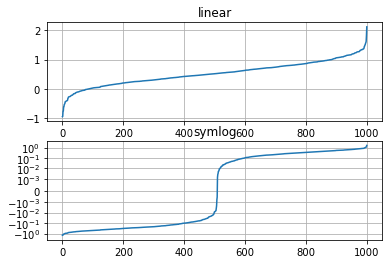

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
# y = f_impt_ResNet
# y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(211)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# symmetric log
plt.subplot(212)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=1e-3)
plt.title('symlog')
plt.grid(True)

plt.show()

In [20]:
np.log10(1)

0.0

In [21]:
fname = 'First and last original training data sample.txt'
Trn_sampleF, Trn_sampleE= np.loadtxt(fname, unpack=True) # reads all files in range and assigns 1st column to thetas and 2nd to Is
print(Trn_sampleF, Trn_sampleE)

fname = 'Transformer S_ATT model feature importance dat_AvgS.txt'
f_impt_Transformer = np.loadtxt(fname, unpack=True) # reads all files in range and assigns 1st column to thetas and 2nd to Is

fname = 'LSTM model feature importance AvgS.txt'
f_impt_LSTM = np.loadtxt(fname, unpack=True) # reads all files in range and assigns 1st column to thetas and 2nd to Is

fname = 'CNN-based(CONV1by1) model feature importance AvgS.txt'
f_impt_CNN = np.loadtxt(fname, unpack=True) # reads all files in range and assigns 1st column to thetas and 2nd to Is

fname = 'Convolutional SC-FFwd attention model feature importance AvgS.txt'
f_impt_CNNATT_SC = np.loadtxt(fname, unpack=True) # reads all files in range and assigns 1st column to thetas and 2nd to Is

fname = 'Convolutional SCT_CAM-FFwd attention model feature importance AvgS.txt'
f_impt_CNNATT_SCT = np.loadtxt(fname, unpack=True) # reads all files in range and assigns 1st column to thetas and 2nd to Is

fname = 'FNN1D model feature importance AvgS.txt'
f_impt_FNN1D = np.loadtxt(fname, unpack=True) # reads all files in range and assigns 1st column to thetas and 2nd to Is

fname = 'ResNet model feature importance AvgS.txt'
f_impt_ResNet = np.loadtxt(fname, unpack=True) # reads all files in range and assigns 1st column to thetas and 2nd to Is


[ 1.52722371e+00  1.53697574e+00  1.41217577e+00  1.02602804e+00
  7.39239573e-01  8.46705019e-01  1.09316623e+00  1.00245285e+00
  7.31014669e-01  7.84846187e-01  7.98929393e-01  5.47396779e-01
  4.22860563e-01  4.71951813e-01  3.75263840e-01  3.42361957e-01
  3.36109847e-01  2.62038201e-01  3.88067156e-01  3.60038579e-01
  3.99977982e-01  5.08334279e-01  5.36221921e-01  3.34376276e-01
  3.98475856e-01  4.07784909e-01  3.44809353e-01  3.57442737e-01
  4.00876790e-01  3.86540592e-01  2.89517999e-01  4.21416074e-01
  5.06523311e-01  4.78962868e-01  3.63486916e-01  3.06637615e-01
  2.50220865e-01  6.64603189e-02  1.26654478e-02  1.03908174e-01
  2.65244991e-01  4.11242694e-01  4.99961108e-01  3.23405325e-01
  1.38526902e-01  3.59852724e-02 -1.61700603e-02 -6.40337393e-02
  9.89881605e-02  2.01239213e-01  2.96400160e-01  3.01034600e-01
  2.79173017e-01  5.59588335e-02 -2.09077746e-02  1.54900089e-01
  3.61968845e-01  5.17275691e-01  5.32811999e-01  6.21062577e-01
  7.39369214e-01  7.07996

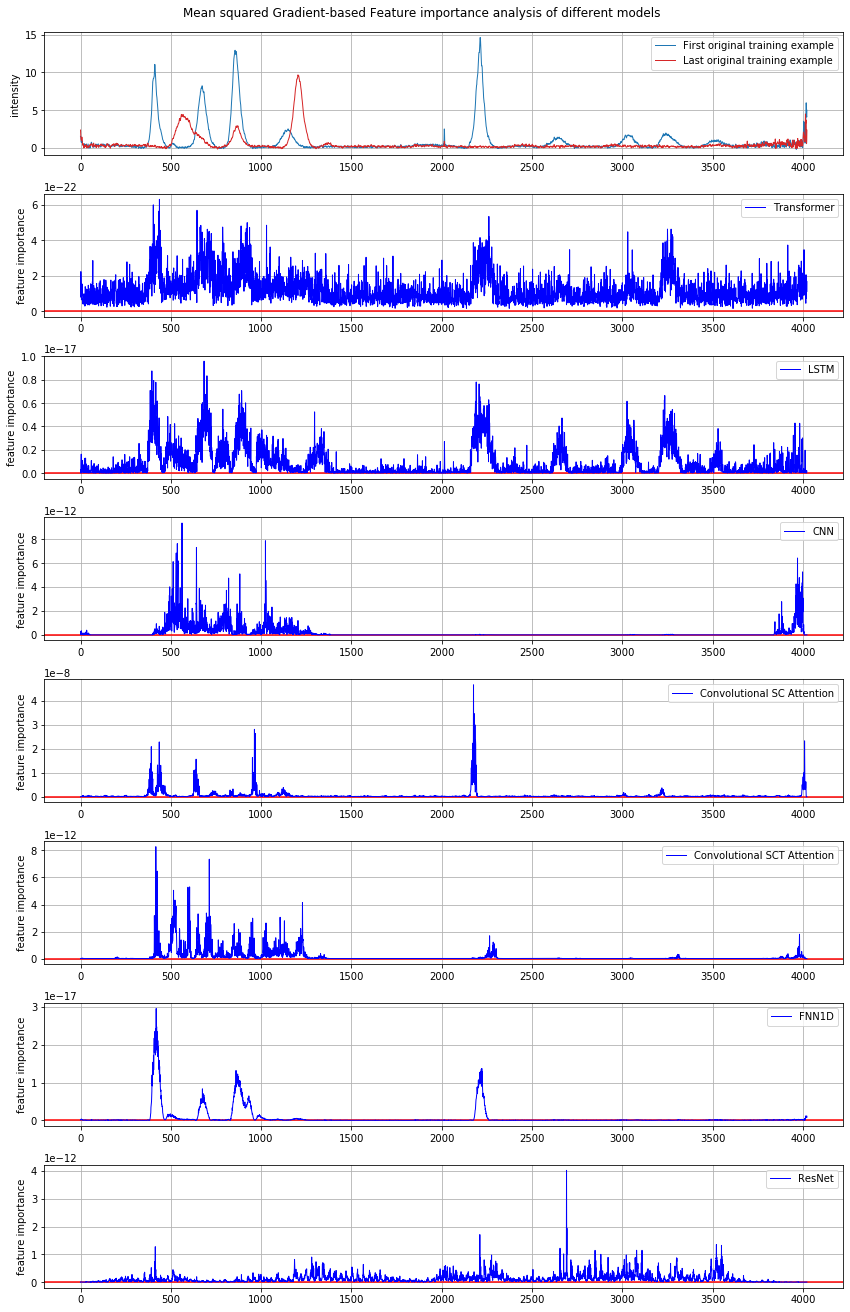

In [22]:

fig, axs = plt.subplots(8, figsize=(12,18))
# plt.xlim(-370, 4100)
axs[0].plot(Trn_sampleF,'tab:blue',linewidth=1,label='First original training example')
axs[0].plot(Trn_sampleE,'tab:red',linewidth=1,label='Last original training example')
axs[0].set_ylabel("intensity")
axs[0].legend()
axs[0].grid()

axs[1].axhline(y=0, color='r', linestyle='-')
axs[1].plot(f_impt_Transformer,'b',linewidth=1,label='Transformer')
axs[1].set_ylabel("feature importance")  #/gradient
axs[1].legend()
axs[1].grid()
# plt.suptitle('Feature importance in Transformer model')


axs[2].axhline(y=0, color='r', linestyle='-')
axs[2].plot(f_impt_LSTM,'b',linewidth=1,label='LSTM')
axs[2].set_ylabel("feature importance")
axs[2].legend()
axs[2].grid()
# plt.suptitle('Feature importance in Transformer model')

axs[3].axhline(y=0, color='r', linestyle='-')
axs[3].plot(f_impt_CNN,'b',linewidth=1,label='CNN')
axs[3].set_ylabel("feature importance")
axs[3].legend()
axs[3].grid()
# plt.suptitle('Feature importance in Transformer model')

axs[4].axhline(y=0, color='r', linestyle='-')
axs[4].plot(f_impt_CNNATT_SC,'b',linewidth=1,label='Convolutional SC Attention')
axs[4].set_ylabel("feature importance")
axs[4].legend()
axs[4].grid()
# plt.suptitle('Feature importance in Transformer model')

axs[5].axhline(y=0, color='r', linestyle='-')
axs[5].plot(f_impt_CNNATT_SCT,'b',linewidth=1,label='Convolutional SCT Attention')
axs[5].set_ylabel("feature importance")
axs[5].legend()
axs[5].grid()

axs[6].axhline(y=0, color='r', linestyle='-')
axs[6].plot(f_impt_FNN1D,'b',linewidth=1,label='FNN1D')
axs[6].set_ylabel("feature importance")
axs[6].legend()
axs[6].grid()
# plt.suptitle('Feature importance in Transformer model')

axs[7].axhline(y=0, color='r', linestyle='-')
axs[7].plot(f_impt_ResNet,'b',linewidth=1,label='ResNet')
axs[7].set_ylabel("feature importance")
axs[7].legend()
axs[7].grid()

plt.tight_layout()
fig.suptitle('Mean squared Gradient-based Feature importance analysis of different models',y=1.01)
# fig.tight_layout()

plt.savefig(save_figures_to+"Feature importance analysis of different models (Average Sum).png", bbox_inches='tight', dpi=300)